In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py

sys.path.insert(0, "../figures/")
sys.path.insert(0, "../lib/")

import plot_generator_outputs

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


../lib/plot_generator_outputs.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
  

In [2]:
varindices = {'u': 0, 'v': 1, 'w': 2, 'p': 3}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':


[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


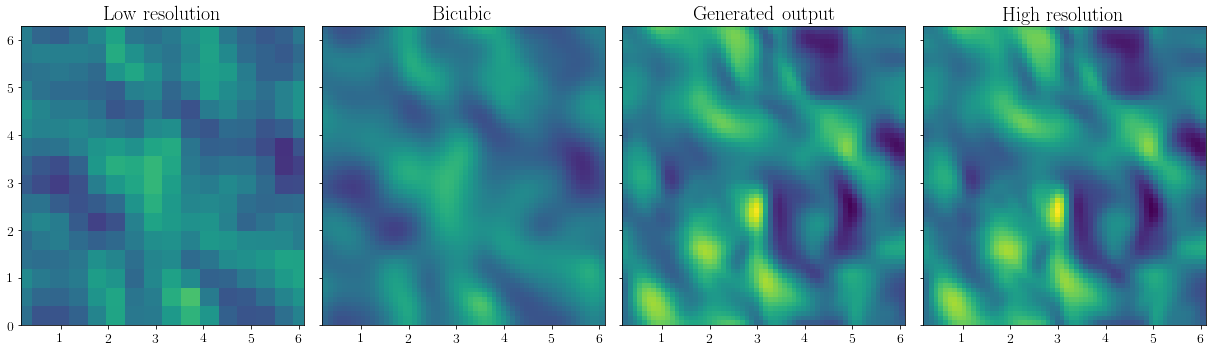

In [3]:
# lambda_p = 0.000

filename = "/home/manlong/IPython_Notebook/TEGAN/long_lambda_p_0_000/TEResNet/output_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.000/Run01_483000.h5"

var = varindices[ 'u' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR  =  HR[batch, index, :, :, var]
    var_LR  =  LR[batch, index, :, :, var]
    var_out = out[batch, index, :, :, var]
elif plane == 1:
    var_HR  =  HR[batch, :, index, :, var]
    var_LR  =  LR[batch, :, index, :, var]
    var_out = out[batch, :, index, :, var]
elif plane == 2:
    var_HR  =  HR[batch,  :, :,index, var]
    var_LR  =  LR[batch,  :, :,index, var]
    var_out = out[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4) = plot_generator_outputs.make_comparison_plots(var_LR, var_HR, var_out)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':


[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


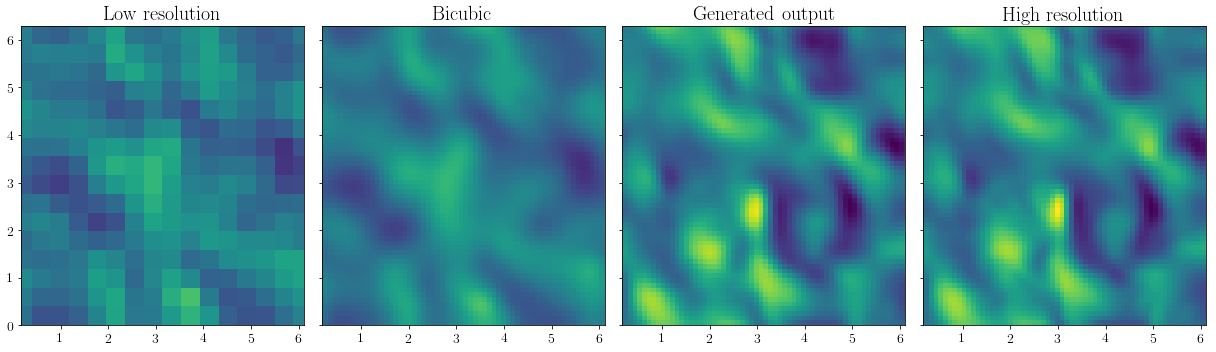

In [4]:
# lambda_p = 0.125

filename = "/home/manlong/IPython_Notebook/TEGAN/long_lambda_p_0_125/TEResNet/output_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.125/Run01_483000.h5"

var = varindices[ 'u' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR  =  HR[batch, index, :, :, var]
    var_LR  =  LR[batch, index, :, :, var]
    var_out = out[batch, index, :, :, var]
elif plane == 1:
    var_HR  =  HR[batch, :, index, :, var]
    var_LR  =  LR[batch, :, index, :, var]
    var_out = out[batch, :, index, :, var]
elif plane == 2:
    var_HR  =  HR[batch,  :, :,index, var]
    var_LR  =  LR[batch,  :, :,index, var]
    var_out = out[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4) = plot_generator_outputs.make_comparison_plots(var_LR, var_HR, var_out)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':


[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


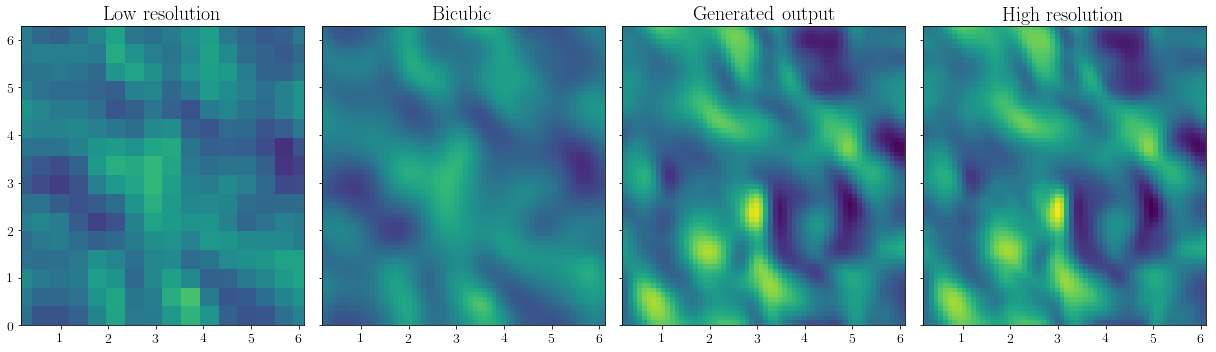

In [5]:
# lambda_p = 0.25

filename = "/home/manlong/IPython_Notebook/TEGAN/long_lambda_p_0_250/TEResNet/output_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.250/Run01_483000.h5"

var = varindices[ 'u' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR  =  HR[batch, index, :, :, var]
    var_LR  =  LR[batch, index, :, :, var]
    var_out = out[batch, index, :, :, var]
elif plane == 1:
    var_HR  =  HR[batch, :, index, :, var]
    var_LR  =  LR[batch, :, index, :, var]
    var_out = out[batch, :, index, :, var]
elif plane == 2:
    var_HR  =  HR[batch,  :, :,index, var]
    var_LR  =  LR[batch,  :, :,index, var]
    var_out = out[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4) = plot_generator_outputs.make_comparison_plots(var_LR, var_HR, var_out)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':


[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


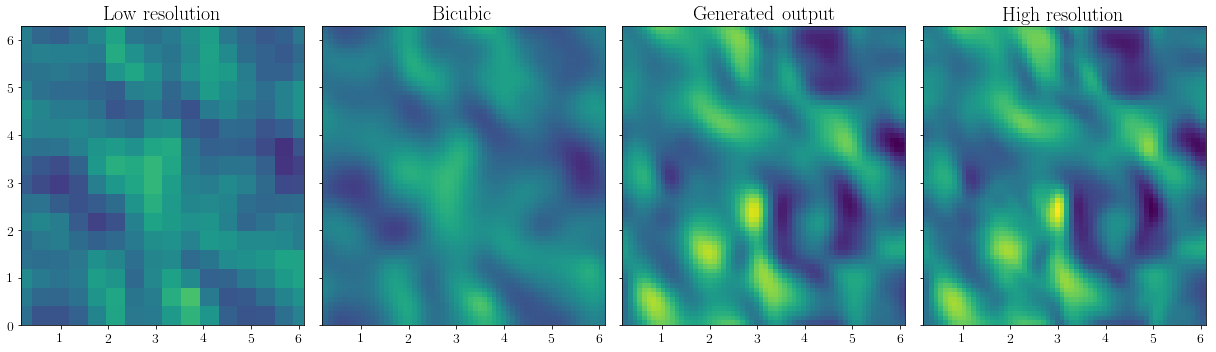

In [6]:
# lambda_p = 0.5

filename = "/home/manlong/IPython_Notebook/TEGAN/long_lambda_p_0_500/TEResNet/output_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.500/Run01_483000.h5"

var = varindices[ 'u' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR  =  HR[batch, index, :, :, var]
    var_LR  =  LR[batch, index, :, :, var]
    var_out = out[batch, index, :, :, var]
elif plane == 1:
    var_HR  =  HR[batch, :, index, :, var]
    var_LR  =  LR[batch, :, index, :, var]
    var_out = out[batch, :, index, :, var]
elif plane == 2:
    var_HR  =  HR[batch,  :, :,index, var]
    var_LR  =  LR[batch,  :, :,index, var]
    var_out = out[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4) = plot_generator_outputs.make_comparison_plots(var_LR, var_HR, var_out)


In [ ]:
# lambda_p = 0.0 and lambda_p = 0.25

filename_1 = "/home/manlong/IPython_Notebook/TEGAN/long_lambda_p_0_000/TEResNet/output_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.000/Run01_483000.h5"
filename_2 = "/home/manlong/IPython_Notebook/TEGAN/long_lambda_p_0_250/TEResNet/output_RB12_LR0.0001_ENS0.2_CON0.5_PHY0.250/Run01_483000.h5"


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


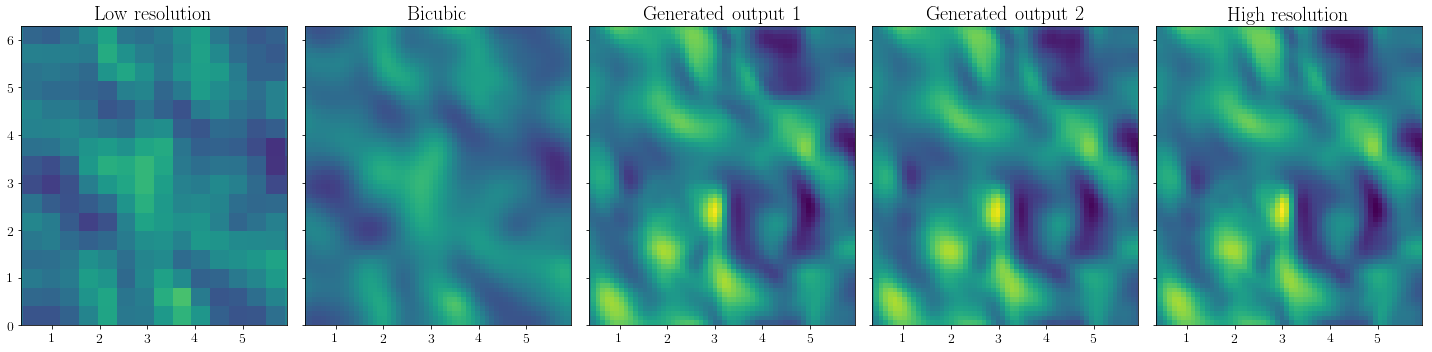

In [7]:

var = varindices[ 'u' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename_1, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_1 = h5f['output'].value

h5f = h5py.File(filename_2, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_2 = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR    =  HR[batch, index, :, :, var]
    var_LR    =  LR[batch, index, :, :, var]
    var_out_1 = out_1[batch, index, :, :, var]
    var_out_2 = out_2[batch, index, :, :, var]
elif plane == 1:
    var_HR    =  HR[batch, :, index, :, var]
    var_LR    =  LR[batch, :, index, :, var]
    var_out_1 = out_1[batch, :, index, :, var]
    var_out_2 = out_2[batch, :, index, :, var]
elif plane == 2:
    var_HR    =  HR[batch,  :, :,index, var]
    var_LR    =  LR[batch,  :, :,index, var]
    var_out_1 = out_1[batch,  :, :,index, var]
    var_out_2 = out_2[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4, ax5) = plot_generator_outputs.make_comparison_plots_2_generators(var_LR, var_HR, var_out_1, var_out_2)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


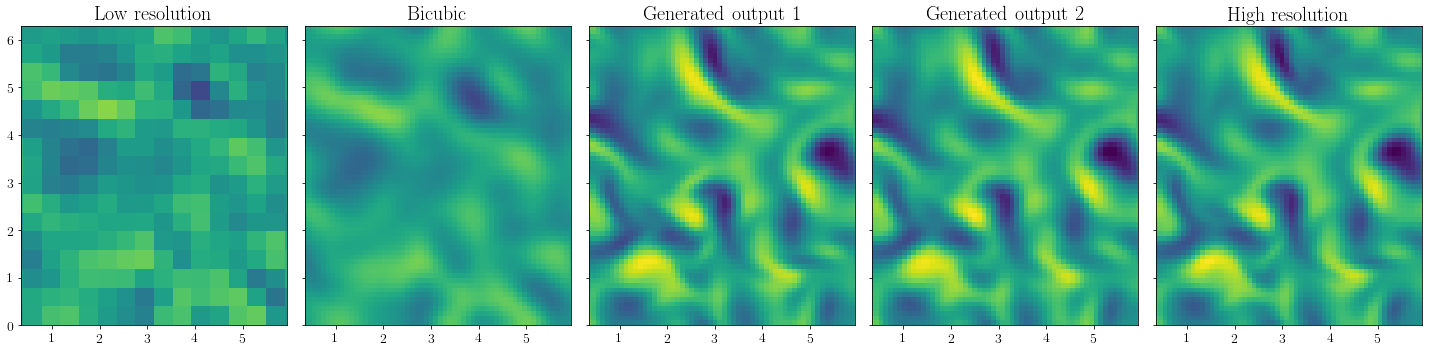

In [8]:

var = varindices[ 'v' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename_1, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_1 = h5f['output'].value

h5f = h5py.File(filename_2, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_2 = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR    =  HR[batch, index, :, :, var]
    var_LR    =  LR[batch, index, :, :, var]
    var_out_1 = out_1[batch, index, :, :, var]
    var_out_2 = out_2[batch, index, :, :, var]
elif plane == 1:
    var_HR    =  HR[batch, :, index, :, var]
    var_LR    =  LR[batch, :, index, :, var]
    var_out_1 = out_1[batch, :, index, :, var]
    var_out_2 = out_2[batch, :, index, :, var]
elif plane == 2:
    var_HR    =  HR[batch,  :, :,index, var]
    var_LR    =  LR[batch,  :, :,index, var]
    var_out_1 = out_1[batch,  :, :,index, var]
    var_out_2 = out_2[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4, ax5) = plot_generator_outputs.make_comparison_plots_2_generators(var_LR, var_HR, var_out_1, var_out_2)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


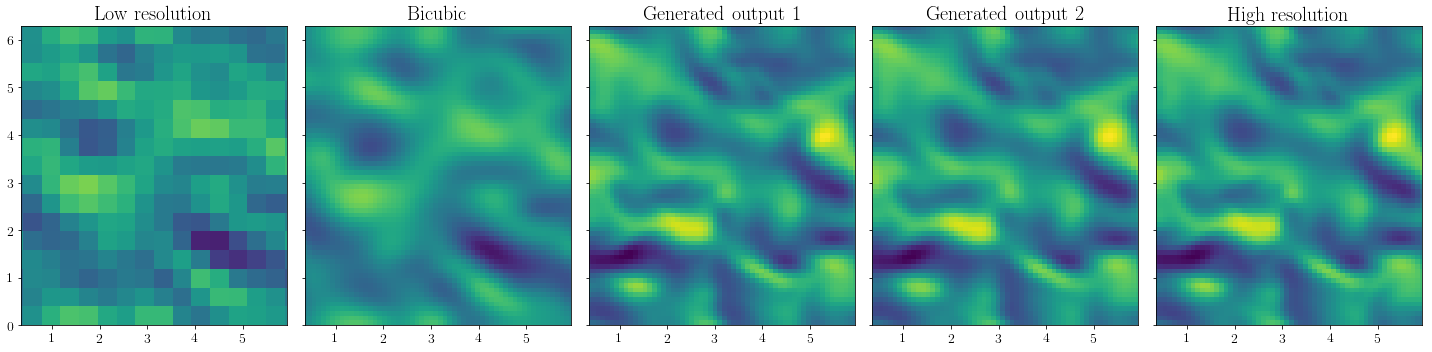

In [9]:

var = varindices[ 'w' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename_1, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_1 = h5f['output'].value

h5f = h5py.File(filename_2, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_2 = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR    =  HR[batch, index, :, :, var]
    var_LR    =  LR[batch, index, :, :, var]
    var_out_1 = out_1[batch, index, :, :, var]
    var_out_2 = out_2[batch, index, :, :, var]
elif plane == 1:
    var_HR    =  HR[batch, :, index, :, var]
    var_LR    =  LR[batch, :, index, :, var]
    var_out_1 = out_1[batch, :, index, :, var]
    var_out_2 = out_2[batch, :, index, :, var]
elif plane == 2:
    var_HR    =  HR[batch,  :, :,index, var]
    var_LR    =  LR[batch,  :, :,index, var]
    var_out_1 = out_1[batch,  :, :,index, var]
    var_out_2 = out_2[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4, ax5) = plot_generator_outputs.make_comparison_plots_2_generators(var_LR, var_HR, var_out_1, var_out_2)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75]


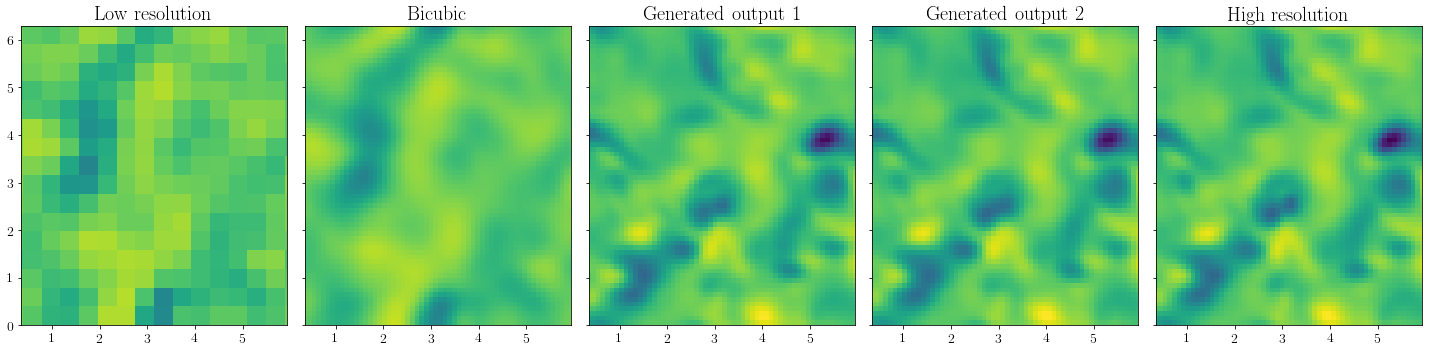

In [10]:

var = varindices[ 'p' ]
plane = int(1)
index = int(15)

h5f = h5py.File(filename_1, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_1 = h5f['output'].value

h5f = h5py.File(filename_2, 'r+')
HR  = h5f['HR'].value
LR  = h5f['LR'].value
out_2 = h5f['output'].value

batch_size, nx, ny, nz, _ = HR.shape
x = np.linspace(0,2.*np.pi,num=nx+1)[:-1].reshape((nx,1,1)).repeat(ny, axis=1).repeat(nz, axis=2)
y = np.linspace(0,2.*np.pi,num=ny+1)[:-1].reshape((1,ny,1)).repeat(nx, axis=0).repeat(nz, axis=2)
z = np.linspace(0,2.*np.pi,num=nz+1)[:-1].reshape((1,1,nz)).repeat(nx, axis=0).repeat(ny, axis=1)

batch = np.random.randint(batch_size, size=1)[0]

if plane == 0:
    var_HR    =  HR[batch, index, :, :, var]
    var_LR    =  LR[batch, index, :, :, var]
    var_out_1 = out_1[batch, index, :, :, var]
    var_out_2 = out_2[batch, index, :, :, var]
elif plane == 1:
    var_HR    =  HR[batch, :, index, :, var]
    var_LR    =  LR[batch, :, index, :, var]
    var_out_1 = out_1[batch, :, index, :, var]
    var_out_2 = out_2[batch, :, index, :, var]
elif plane == 2:
    var_HR    =  HR[batch,  :, :,index, var]
    var_LR    =  LR[batch,  :, :,index, var]
    var_out_1 = out_1[batch,  :, :,index, var]
    var_out_2 = out_2[batch,  :, :,index, var]
else:
    raise ValueError('Plane has to be 0, 1 or 2. Given {}'.format(plane))

fig, (ax1, ax2, ax3, ax4, ax5) = plot_generator_outputs.make_comparison_plots_2_generators(var_LR, var_HR, var_out_1, var_out_2)
